# Black Friday Sales Prediction. (EDA ONLY)
Black Friday is a colloquial term for the Friday after Thanksgiving in the United States. It traditionally marks the start of the Christmas shopping season in the United States. Many stores offer highly promoted sales at discounted prices and often open early, sometimes as early as midnight or even on Thanksgiving. Some stores' sales continue to Monday ("Cyber Monday") or for a week ("Cyber Week").
Black Friday occurs on the day after Thanksgiving in the United States. Black Friday has routinely been the busiest shopping day of the year in the United States.
This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The train dataset has 550,068 rows and 12 columns.


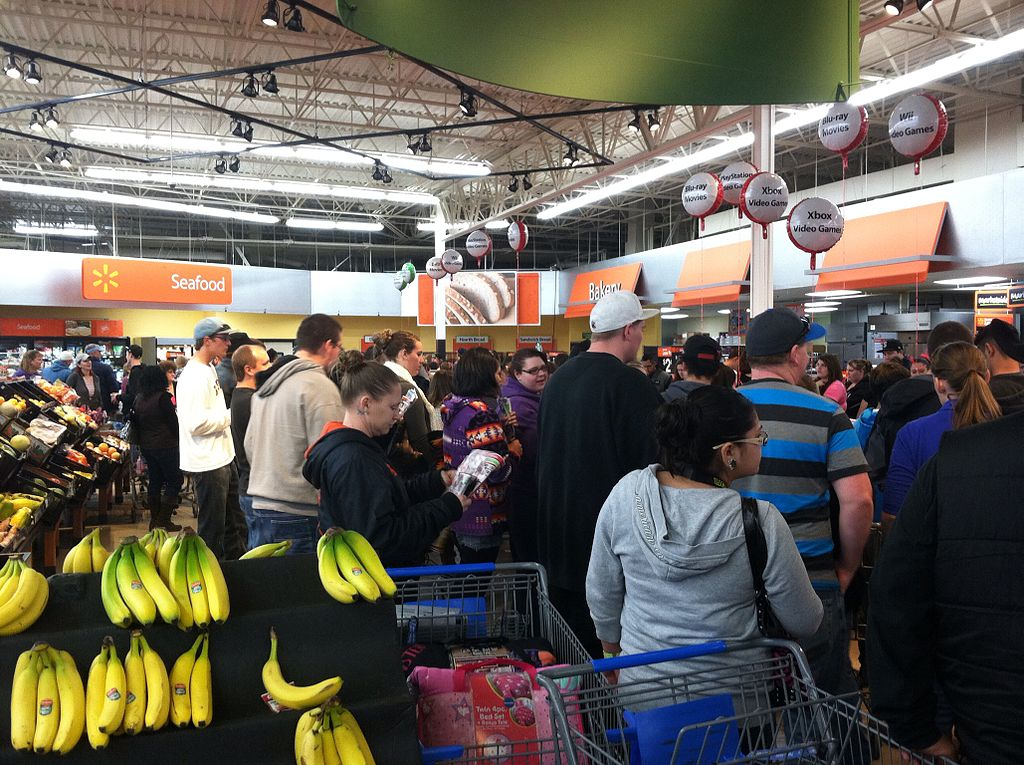

# Data Overview:

Dataset has 550068 rows (transactions) and 12 columns (features) as described below:

User_ID: Unique Id  of the Customer has 5891 unique data.

Product_ID: Unique Product Id has  3631 unique data.

Gender: Indicate the gender of the customer has  2 unique data.

Age: Age of the Customer either Male or Female has 7  unique data.

Occupation: Occuaption of the Customer  has 21 unique data.

City_Category: which city is customer from has 3 unique data.

Stay_In_Current_City_Years: Current city of the Customers has 5 unique data.

Marital_Status: Wheather the customer is married or not has 2 unique data.

Product_Category_1  have 20 unique data.
Product_Category_2 have 17 unique data.
Product_Category_3 have 15 unique data.

PRODUCT(1-3) is the category of the product in sales of Black friday Sales.

Purchase which is our target variable is total sales of product per person.

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Importing Dataset and creating DataFrame.**

In [2]:
df_train=pd.read_csv('blackfriday_train.csv')
df_test=pd.read_csv('blackfriday_test.csv')

In [3]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


By  looking at the dataset, we  notice that the dataset contains both numerical and categorical value in it

In [4]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df_train.shape

(550068, 12)

In [31]:
#Numerical Variable.
numeric_var=df_train.select_dtypes(include=["number"])

numerical=numeric_var.columns.tolist()
numerical

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [32]:
#Categorical Variable
cat_var=df_train.select_dtypes(include=["object"])

categorical=cat_var.columns.tolist()
categorical

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [12]:
#Descriptive Statistics of Numerical Variable.

df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Let's Create a Visual Representation of datset on Heatmap

<AxesSubplot:>

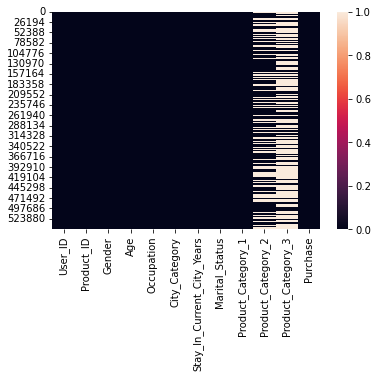

In [13]:
sns.heatmap(df_train.isnull())

In [14]:
for col in df_train.columns:
    null_pct = (df_train[col].isnull().sum()*100)/len(df_train[col].index)
    print(f"{col} null percentage: {round(null_pct, 1)}%")

User_ID null percentage: 0.0%
Product_ID null percentage: 0.0%
Gender null percentage: 0.0%
Age null percentage: 0.0%
Occupation null percentage: 0.0%
City_Category null percentage: 0.0%
Stay_In_Current_City_Years null percentage: 0.0%
Marital_Status null percentage: 0.0%
Product_Category_1 null percentage: 0.0%
Product_Category_2 null percentage: 31.6%
Product_Category_3 null percentage: 69.7%
Purchase null percentage: 0.0%


Looking at the information above regarding the amount of null values in the variables, only Project_Category_2 and Project_Category_3 features contain null values of approximately 32% and 70% respectively. Product_Category_3 has much null values (70%). Before we perform any sort of replacement of the null values, there is a need to investigate why the null values.

Looking at the dataset, in Product IDfeature, each unique product ID has categories of products (i.e . Product_Category_1, Product_Category_2 and Product_Category_3) that can be purchased. The null values could be as a result of some product IDs don't have particular product category/categories or some customers chose not to buy certain categories of some product IDs. Therefore, it will be right to say there are some product IDs that don't have certain product category/categories or some customer chose not to buy certain product category/categories of some products (product IDs). Since the whole idea centers on "no", so let's replace the null values with 0 (zero).

Each value of any of the Product Category features (i.e. Product_Category_1, Product_Category_2 and Product_Category_3) is the number of products of a certain product (i.e. Product_ID) purchased in that category. Every customer that attended the sale purchased products that fall under Product_Category_1.

In [15]:
# Replacing null values with 0 
df_train.fillna(value=0, inplace=True)
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [17]:
df_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [21]:
print(f"Product_Category_2 unique values: {df_train.Product_Category_2.unique()} \n")
print(f"Product_Category_3 unique values: {df_train.Product_Category_3.unique()}")

Product_Category_2 unique values: [ 0.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] 

Product_Category_3 unique values: [ 0. 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


We can see that no variable has null values and the null values in Product_Category_2 and Product_Category_3 have been replaced with 0.

# Data Visualization

***Numerical Variables***

Starting with our Traget Variable which is **Purchase** and also a Numerical Variable.

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

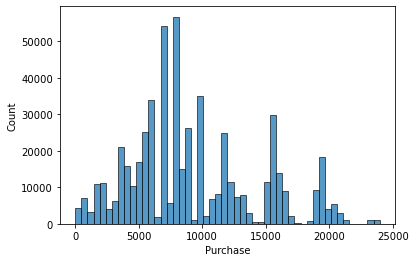

In [27]:
sns.histplot(df_train.Purchase, bins=50)

By looking at the histograph we conclude that purchase of the products is high in the range of 5000-10000 to that of 15000 and 20000.

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Product_Category_1'}>,
        <AxesSubplot:title={'center':'Product_Category_2'}>,
        <AxesSubplot:title={'center':'Product_Category_3'}>],
       [<AxesSubplot:title={'center':'Purchase'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

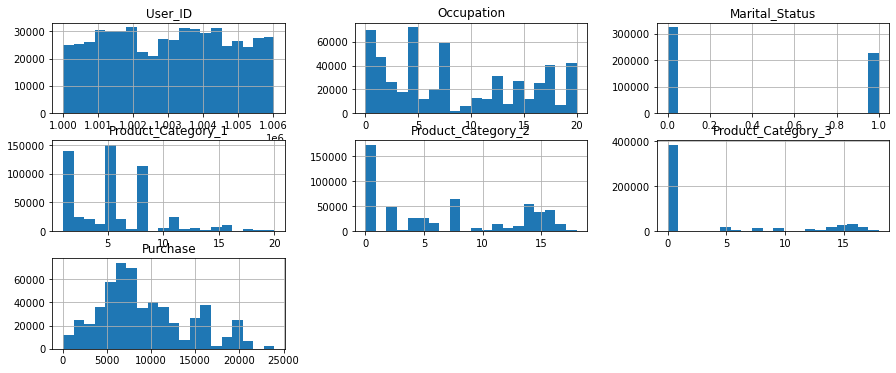

In [35]:
df_train[numerical].hist(bins=20, figsize=(15,6))

Unmarried persons tends to shop more  on blackfriday sales.rather than married persons.

***Categorical Variables***

<AxesSubplot:xlabel='Product_ID', ylabel='count'>

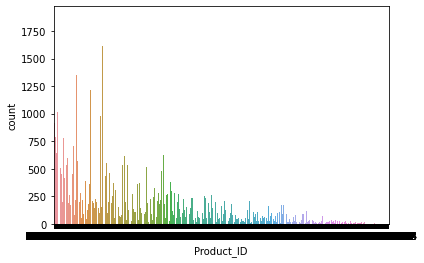

In [40]:
sns.countplot(x='Product_ID',data=df_train)

<AxesSubplot:xlabel='Gender', ylabel='count'>

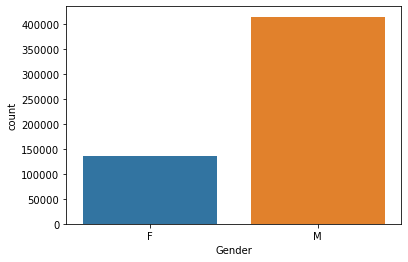

In [41]:
sns.countplot(x='Gender',data=df_train)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

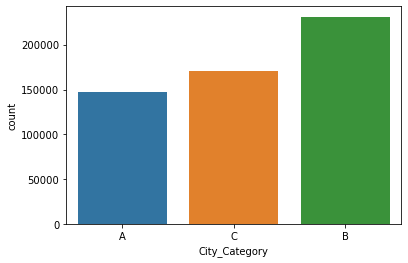

In [42]:
sns.countplot(x='City_Category',data=df_train)

<AxesSubplot:xlabel='Age', ylabel='count'>

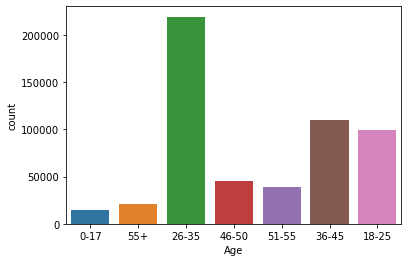

In [43]:
sns.countplot(x='Age',data=df_train)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

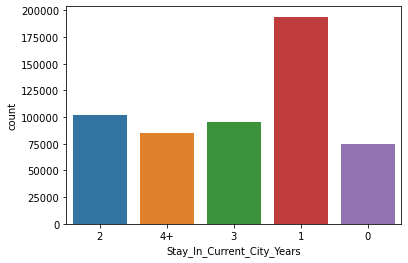

In [44]:
sns.countplot(x='Stay_In_Current_City_Years',data=df_train)

**Observations:**

* In Gender, High number of customer are Male customers on black friday sales

* In Age Customers of age 26-35 are higher in Black friday sales.the least purchase are from the range of 0-17 and 55+ (55+ are because of age Factor) and (0-17 is because of dependancy on other.)

* In City  mostly customers are comming from **City-B**. and least among city is from **City-A**.

* Person that have shifted  recently or having  one year tends to shop more than person who is reciding fo 4+ year o is least because may be the person have not know about the BlackFriday sales. 



In [45]:
# Unique values count of categorical variables
for variable in categorical:
    print(f"Unique values count of {variable} feature:\n{df_train[variable].value_counts()}\n\n--------------------------------------------------")

Unique values count of Product_ID feature:
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

--------------------------------------------------
Unique values count of Gender feature:
M    414259
F    135809
Name: Gender, dtype: int64

--------------------------------------------------
Unique values count of Age feature:
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

--------------------------------------------------
Unique values count of City_Category feature:
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

--------------------------------------------------
Unique values count of Stay_In_Current_City_Years feature:
1     193821
2     101838
3      95285
4+     84726
0      74398
Name

Plotting relationship between variables.This helps us to visually  understand  correlations.

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

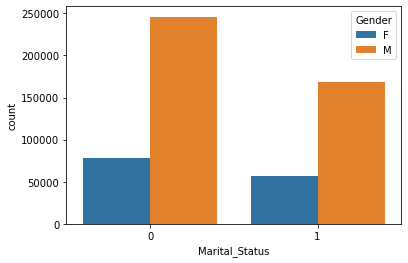

In [47]:
sns.countplot(x='Marital_Status',hue='Gender',data=df_train)

Married Male customers tends to shop more in black friday, its may also due   maybe their spouse purchase product from their husband Credit or debit Card

<AxesSubplot:xlabel='Age', ylabel='count'>

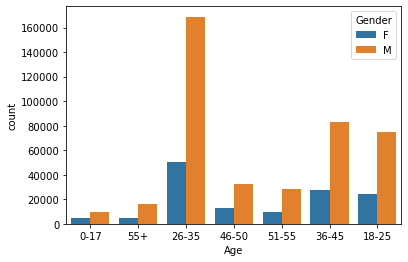

In [49]:
sns.countplot(x='Age',hue='Gender',data=df_train)

Male customer from the range pf age 26-35 shops more than any other age range , thus  from the grsph we can see clearly that male customer dhops more than women customer in Black Friday Sales.

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

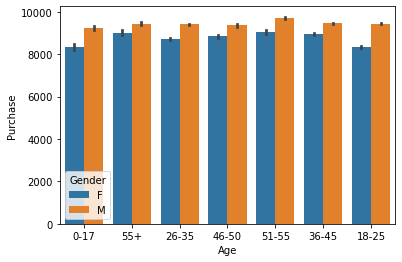

In [50]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df_train)

average sale arounnd all the group age is below 10000 and above 8000 .and male customers tends to shop more than women .

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

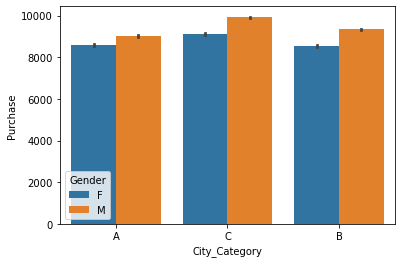

In [53]:
sns.barplot(x='City_Category',y='Purchase',hue='Gender',data=df_train)

Maximum purchase is done by **city C**  male comapred to all three city. and all male from all the city shops  more than female

In [54]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


As we can see in the User_ID some values are identical. that mean same customer purchase more than one times, we can find the number of unique person attennded the sales.

Now let's make analysis base on the number of unique persons that attended the Black Friday Sale.

In [58]:
df_train["User_ID"].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

From this data, 5891 unique persons attended the sale. All of them made more than one purchase. Customer with User ID 1001680 made the highest purchase while customer with User_ID 1000708 made the least purchase.

In [60]:
# Creating a table of unique persons(i.e. unique User_ID)
unique1 = df_train[df_train["User_ID"]==df_train.User_ID.unique()[0]] 
all_unique = unique1.head(1)
all_unique["Purchase_Count"] = list(unique1.User_ID.value_counts())

for id in df_train.User_ID.unique()[1:]:
    unique_id = df_train[df_train["User_ID"]==id].head(1)
    count = list(df_train[df_train["User_ID"]==id].User_ID.value_counts())
    unique_id["Purchase_Count"] = count
    all_unique = pd.concat([all_unique, unique_id]).reset_index(drop=True)
all_unique.drop(["Product_ID", "Product_Category_1", "Product_Category_2", "Product_Category_3", "Purchase"], axis=1, inplace=True)
all_unique.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Count
0,1000001,F,0-17,10,A,2,0,35
1,1000002,M,55+,16,C,4+,0,77
2,1000003,M,26-35,15,A,3,0,29
3,1000004,M,46-50,7,B,2,1,14
4,1000005,M,26-35,20,A,1,1,106


In [61]:
all_unique.Gender.value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

Number of unique males and females that attended the sale. We can see that the males made the highest attendance during the sale. Let's visualize with a chart.

<AxesSubplot:xlabel='Gender', ylabel='count'>

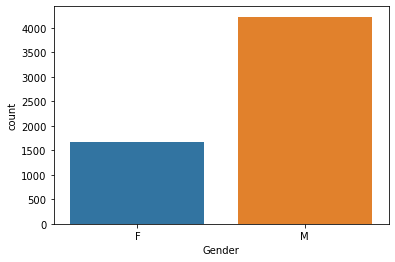

In [62]:
sns.countplot(x="Gender", data=all_unique)

<AxesSubplot:xlabel='Age', ylabel='count'>

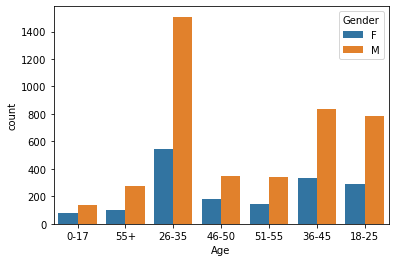

In [63]:
sns.countplot(x="Age", hue="Gender", data=all_unique)

The number of persons that attended the sale are mostly males in all age range; males in age range 26-35 attended mostly.

<AxesSubplot:xlabel='Age', ylabel='count'>

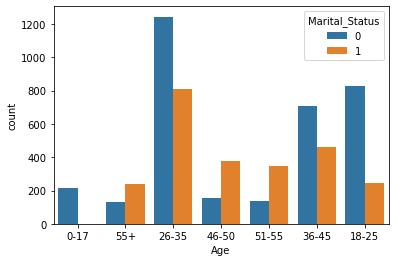

In [64]:
sns.countplot(x="Age", hue="Marital_Status", data=all_unique)

No married person of age range 0-17 atteneded the sale. The unmarried in age range 26-35 made the highest attendance.

<AxesSubplot:xlabel='City_Category', ylabel='count'>

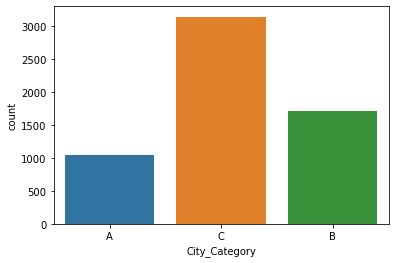

In [65]:
sns.countplot(x="City_Category", data=all_unique)

City C has the highest attandence during the sale.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

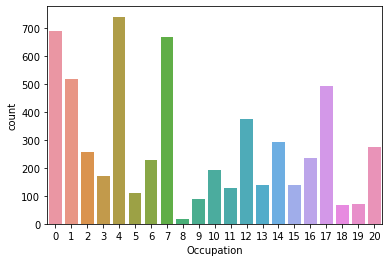

In [66]:
sns.countplot(x="Occupation", data=all_unique)

Most persons with occupation 4 attended the sale while the least are persons with occupation 8.

Let's find the top five customers that made the highest purchase

In [67]:
top_five = all_unique.sort_values(by="Purchase_Count", ascending=False).head()
top_five

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Count
1488,1001680,M,26-35,20,A,3,1,1026
3772,1004277,M,36-45,16,A,0,0,979
1716,1001941,M,36-45,17,A,1,0,898
1049,1001181,M,36-45,7,A,3,1,862
790,1000889,M,46-50,20,A,1,0,823


The user ID of the top five customers with the highest purchase count are 1001680, 1004277, 1001941, 1001181 and 1000889 with purchase count (i.e. number of times each made purchase) of 1026, 979, 898, 862 and 823 respectively.

<AxesSubplot:xlabel='User_ID', ylabel='Purchase_Count'>

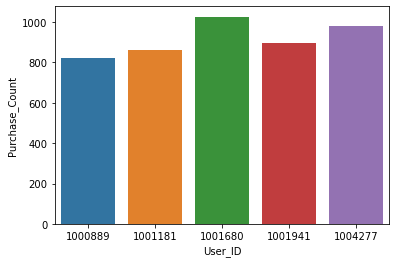

In [68]:
sns.barplot(x="User_ID", y="Purchase_Count", data=top_five)

Custumer with user ID 1001680 has the highest purchase count.

From the dataset above, we can see the following about the top five customers by Purchase Count (number of times they made purchase):

* They are all male customers. It looks like products sold during this black friday were needed mostly by the males.

* First and fourth customers age ranges 26-35 and 46-50 respectively while others are 36-45.

* Their occupations are 20, 16, 17, 7, 20 respectively.

* They all stay in the same city (city A).

* They have stayed in their current city (city A) for 3 years, 0 year, 1 year, 3 years and 1 year respectively.

* The first and the fourth customers are married while others are not.

In [69]:
def formatNum(int):
    temp = str(int)[::-1]
    n = 0
    str1 = ""
    for i in temp:
        if n == 3: 
            str1 = str1+ ","+i
            n = 0
        else:
            str1 = str1+i
        n+=1
    return str1[::-1]
    
print(f"Total Amount Made During The Black Friday Sale: {formatNum(df_train.Purchase.sum())}")

Total Amount Made During The Black Friday Sale: 5,095,812,742


In [71]:
# Inserting a new column "Total_Purchase_Amount" in all_unique dataset
unique_id_total_purchase = all_unique
unique_id = df_train.User_ID.unique()
id_total=[]
for id in unique_id:
    id_total.append(df_train[df_train["User_ID"]==id].Purchase.sum())
unique_id_total_purchase["Total_Purchase_Amount"] = id_total
unique_id_total_purchase.head(5) 

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Count,Total_Purchase_Amount
0,1000001,F,0-17,10,A,2,0,35,334093
1,1000002,M,55+,16,C,4+,0,77,810472
2,1000003,M,26-35,15,A,3,0,29,341635
3,1000004,M,46-50,7,B,2,1,14,206468
4,1000005,M,26-35,20,A,1,1,106,821001


First five rows of unique customers that attended the Black Friday Sale and the total amount each of them spent (Total_Purchase_Amount column) in purchasing products.

In [72]:
# Creating a table of maximum and minimum total purchase amount
max_purchase = unique_id_total_purchase.Total_Purchase_Amount.max()
min_purchase = unique_id_total_purchase.Total_Purchase_Amount.min()
max_info = unique_id_total_purchase[unique_id_total_purchase["Total_Purchase_Amount"]==max_purchase]
min_info = unique_id_total_purchase[unique_id_total_purchase["Total_Purchase_Amount"]==min_purchase]
max_and_min_data = pd.concat([max_info, min_info]).reset_index(drop=True)
max_and_min_data

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Count,Total_Purchase_Amount
0,1004277,M,36-45,16,A,0,0,979,10536909
1,1004464,F,51-55,1,C,1,0,9,46681


From this table, customer with user ID 1004277 made the highest total purchase amount while 1004464 made the least total purchase amount.

In [73]:
# Top five by Total_Purchase_Amount
top_five = unique_id_total_purchase.sort_values(by="Total_Purchase_Amount", ascending=False)
top_five_purchase_amount = top_five.head()
top_five_purchase_amount

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Count,Total_Purchase_Amount
3772,1004277,M,36-45,16,A,0,0,979,10536909
1488,1001680,M,26-35,20,A,3,1,1026,8699596
2555,1002909,M,26-35,7,A,1,0,718,7577756
1716,1001941,M,36-45,17,A,1,0,898,6817493
386,1000424,M,26-35,17,A,3,0,694,6573609


From this table, we can see that the total purchase amount of a customer is not being determined by the number of times that customer made purchases (Purchase_Count) but the type of products the customer purchased.

<AxesSubplot:xlabel='User_ID', ylabel='Total_Purchase_Amount'>

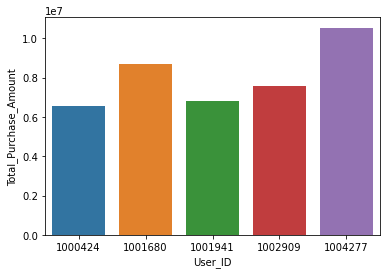

In [74]:
sns.barplot(x="User_ID", y="Total_Purchase_Amount", data=top_five_purchase_amount)

From the dataset above, we can see the following about the top five customers by Total_Purchase_Amount:

* All the customers are males.

* The first and the fourth customers age range is 36-45 while the rest is age range 26-35.

* Their occupations are 16, 20, 7, 17 and 17 respectively.

* They all stay in the same city (city A). The customer that made the highest number purchase and the customer that has the highest total purchase amount live in city A.

* They have stayed in their current city (city A) for 0 years, 3 year, 1 year, 1 year and 3 years respectively.

* They are all unmarried except the second customer.